In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [44]:
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [45]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [46]:
print(df.duplicated().sum())

0


In [47]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [48]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [49]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

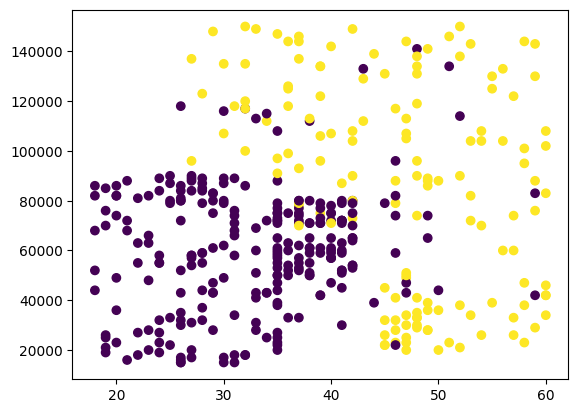

In [50]:
plt.scatter(x = df.iloc[:,0], y = df.iloc[:,1], c=y)

In [51]:
X.iloc[:,0]

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

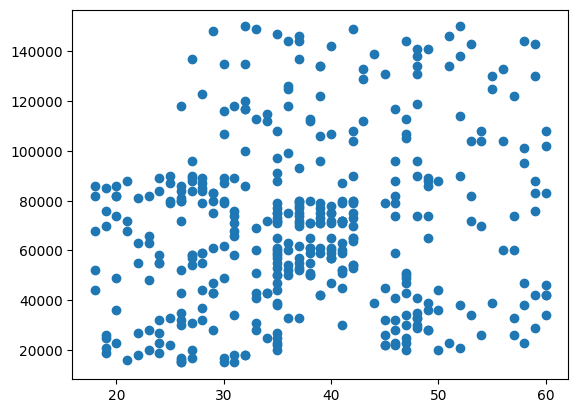

In [52]:
plt.scatter(x = X['Age'], y=X['EstimatedSalary'])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle = True)

In [55]:
X_train.shape

(320, 2)

In [56]:
X_test.shape

(80, 2)

In [57]:
y_train.shape

(320,)

In [58]:
type(y_train)

pandas.core.series.Series

In [59]:
X_train = torch.tensor(X_train.to_numpy(), dtype = torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype = torch.float32)

In [60]:
y_train = torch.tensor(y_train.to_numpy(), dtype = torch.float32)
y_test = torch.tensor(y_test.to_numpy() , dtype = torch.float32)

In [61]:
X_train.shape

torch.Size([320, 2])

In [62]:
y_train.shape

torch.Size([320])

In [63]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features = 2, out_features = 4)
        self.l2 = nn.Linear(in_features =4,out_features = 2)
        self.l3 = nn.Linear(in_features = 2, out_features = 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.sigmoid(self.l3(x))
        return x
        

In [64]:
model = NeuralNet()

In [65]:
model.parameters()

<generator object Module.parameters at 0x7f2fe3a3bf40>

In [66]:
import torch.optim as optim

loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.08)

In [67]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.08
    maximize: False
    weight_decay: 0
)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([320, 2])
torch.Size([80, 2])
torch.Size([320])
torch.Size([80])


In [69]:
print(y_train)

tensor([0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 0., 

In [70]:
epochs = 500
for i in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    y_train = y_train.view(-1,1)
    loss = loss_function(y_pred, y_train )
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(X_test)
        y_test = y_test.view(-1,1)
        loss_test = loss_function( y_pred_test, y_test)
        
    print(f'Epoch [{i}/{epochs}], Training Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch [0/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [1/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [2/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [3/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [4/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [5/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [6/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [7/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [8/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [9/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [10/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [11/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [12/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [13/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [14/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [15/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [16/500], Training Loss: 35.9375, Test Loss: 35.0000
Epoch [

In [71]:
# print(model(X_train))

In [72]:
print(f"Layer 1 output: {model.l1(X_train[:5])}")
print(f"Layer 2 output (before sigmoid): {model.l2(model.relu(model.l1(X_train[:5])))}")
print(f"Model predictions: {y_pred[:5]}")

Layer 1 output: tensor([[ 11077.6143, -38155.9141,  -3142.5566,  33882.0586],
        [  5456.8101, -18732.9805,  -1529.3550,  16642.6289],
        [ 26030.5391, -89707.2891,  -7397.9692,  79652.8828],
        [  7591.2334, -26098.6445,  -2138.9316,  23181.4863],
        [  5073.6245, -17390.3809,  -1413.7682,  15453.2588]],
       grad_fn=<AddmmBackward0>)
Layer 2 output (before sigmoid): tensor([[  7364.8091, -16561.4707],
        [  3612.9756,  -8139.2129],
        [ 17317.4922, -38930.5156],
        [  5035.3276, -11334.4033],
        [  3352.8181,  -7559.3740]], grad_fn=<AddmmBackward0>)
Model predictions: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)


# LETS IMPLEMENT STANDARDIZATION

In [73]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
print(X_test.dtype)

float64


In [77]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

In [78]:
print(X_test.dtype)

torch.float32


In [79]:
model1 = NeuralNet()

In [80]:
optimizer = optim.Adam(model1.parameters(), lr= 0.01)

In [81]:
X_train.shape

torch.Size([320, 2])

In [82]:
print(model1(X_train).shape)

torch.Size([320, 1])


In [83]:
epochs = 500
for i in range(epochs):
    model1.train()
    optimizer.zero_grad()
    y_pred = model1(X_train)
    y_train = y_train.view(-1,1)
    loss = loss_function(y_pred, y_train )
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        y_pred_test = model1(X_test)
        y_test = y_test.view(-1,1)

        loss_test = loss_function( y_pred_test, y_test)
        
    print(f'Epoch [{i}/{epochs}], Training Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch [0/500], Training Loss: 0.7168, Test Loss: 0.7141
Epoch [1/500], Training Loss: 0.7143, Test Loss: 0.7118
Epoch [2/500], Training Loss: 0.7120, Test Loss: 0.7096
Epoch [3/500], Training Loss: 0.7098, Test Loss: 0.7076
Epoch [4/500], Training Loss: 0.7077, Test Loss: 0.7056
Epoch [5/500], Training Loss: 0.7057, Test Loss: 0.7038
Epoch [6/500], Training Loss: 0.7038, Test Loss: 0.7021
Epoch [7/500], Training Loss: 0.7021, Test Loss: 0.7005
Epoch [8/500], Training Loss: 0.7004, Test Loss: 0.6989
Epoch [9/500], Training Loss: 0.6988, Test Loss: 0.6974
Epoch [10/500], Training Loss: 0.6973, Test Loss: 0.6960
Epoch [11/500], Training Loss: 0.6959, Test Loss: 0.6945
Epoch [12/500], Training Loss: 0.6945, Test Loss: 0.6931
Epoch [13/500], Training Loss: 0.6931, Test Loss: 0.6918
Epoch [14/500], Training Loss: 0.6918, Test Loss: 0.6904
Epoch [15/500], Training Loss: 0.6905, Test Loss: 0.6890
Epoch [16/500], Training Loss: 0.6892, Test Loss: 0.6877
Epoch [17/500], Training Loss: 0.6880, Te

In [85]:
#This shows that: the model was not able to learn because the input data were not in same range. So, After applying Standardization, accuracy improved
